In [102]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq, least_squares
import matplotlib
from matplotlib import cm
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from astropy.modeling import models, fitting
from astropy.stats import sigma_clipped_stats, sigma_clip
import sep
from photutils.detection import DAOStarFinder
from photutils import CircularAperture
from scipy.stats import norm
import photutils
%matplotlib notebook

In [3]:
f1 = fits.open('Doppler_maps/FINAL/data_60-3.fits')
f2 = fits.open('Doppler_maps/FINAL/data_68-1.fits')
f3 = fits.open('Doppler_maps/FINAL/model_60-3.fits')
f4 = fits.open('Doppler_maps/FINAL/model_68-1.fits')
data1 = -f1[0].data
data2 = -f2[0].data
data3 = -f3[0].data
data4 = -f4[0].data

In [4]:
X = np.linspace(-500,500,1000)
Y = np.linspace(-500,500,1000)
X, Y = np.meshgrid(X, Y)

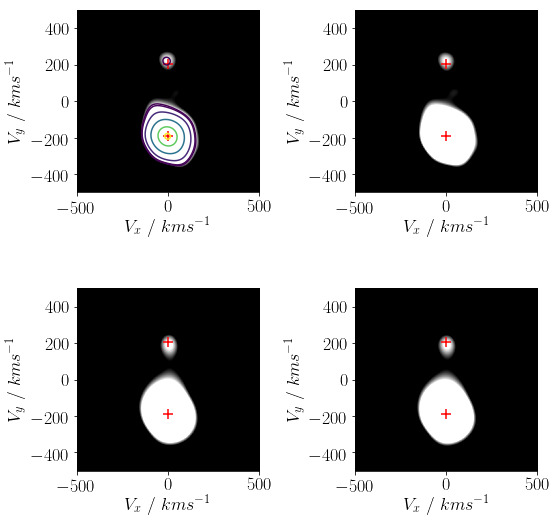

In [5]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18

levels = np.array([1480,1525,1800,2500,3500, 4150])
levels2 = np.array([980,1100,1800,2500,3500, 4150])

fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(8,8))
# im = ax.imshow(posData, cmap='gray', origin='lower', norm=LogNorm(vmin=1350, vmax=1800), extent=(X.min(), X.max(), Y.min(), Y.max()))
im = ax[0,0].imshow(data1, cmap='gray', origin='lower',vmin=1370,vmax=1500,extent=(X.min(), X.max(), Y.min(), Y.max()))
ax[0,0].contour(X, Y, data1, levels)
ax[0,0].scatter(0,205.2, marker='+', c='r', s=100)
ax[0,0].scatter(0,-190.6, marker='+', c='r', s=100)
ax[0,0].set_xlabel('$V_{x}~/~kms^{-1}$')
ax[0,0].set_ylabel('$V_{y}~/~kms^{-1}$')

im = ax[0,1].imshow(data2, cmap='gray', origin='lower',vmin=1370,vmax=1500,extent=(X.min(), X.max(), Y.min(), Y.max()))
# ax[0,1].contour(X, Y, data2, levels)
ax[0,1].scatter(0,205.2, marker='+', c='r', s=100)
ax[0,1].scatter(0,-190.6, marker='+', c='r', s=100)
ax[0,1].set_xlabel('$V_{x}~/~kms^{-1}$')
ax[0,1].set_ylabel('$V_{y}~/~kms^{-1}$')

im = ax[1,0].imshow(data3, cmap='gray', origin='lower',vmin=970,vmax=1100,extent=(X.min(), X.max(), Y.min(), Y.max()))
# ax[1,0].contour(X, Y, data3, levels2)
ax[1,0].scatter(0,205.2, marker='+', c='r', s=100)
ax[1,0].scatter(0,-190.6, marker='+', c='r', s=100)
ax[1,0].set_xlabel('$V_{x}~/~kms^{-1}$')
ax[1,0].set_ylabel('$V_{y}~/~kms^{-1}$')

im = ax[1,1].imshow(data4, cmap='gray', origin='lower',vmin=970,vmax=1100,extent=(X.min(), X.max(), Y.min(), Y.max()))
# ax[1,1].contour(X, Y, data4, levels2)
ax[1,1].scatter(0,205.2, marker='+', c='r', s=100)
ax[1,1].scatter(0,-190.6, marker='+', c='r', s=100)
ax[1,1].set_xlabel('$V_{x}~/~kms^{-1}$')
ax[1,1].set_ylabel('$V_{y}~/~kms^{-1}$')

# plt.colorbar(im)
plt.tight_layout()
plt.show()
# fig.savefig('dopplermodel70.eps')

<IPython.core.display.Javascript object>


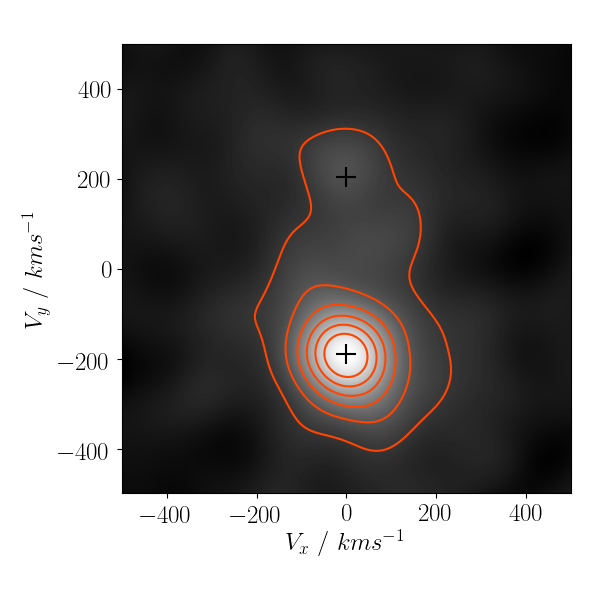

In [144]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18

levels = np.array([1480,1980,2480,2980, 3480,3980])
levels2 = np.array([1100,1600,2100,2600,3100, 3600])

fig, ax = plt.subplots(figsize=(6,6))
# im = ax.imshow(posData, cmap='gray', origin='lower', norm=LogNorm(vmin=1350, vmax=1800), extent=(X.min(), X.max(), Y.min(), Y.max()))
im = ax.imshow(data1, cmap='gray', origin='lower',
               extent=(X.min(), X.max(), Y.min(), Y.max()))
ax.contour(X, Y, data1, levels2, zorder=1, colors=['orangered','orangered','orangered','orangered','orangered'])
ax.scatter(0,205.2, marker='+', c='k', s=200,zorder=2)
ax.scatter(0,-190.6, marker='+', c='k', s=200,zorder=2)
ax.set_xlabel('$V_{x}~/~kms^{-1}$')
ax.set_ylabel('$V_{y}~/~kms^{-1}$')
# plt.colorbar(im)
plt.show()
plt.tight_layout()
# fig.savefig('dopplerModel68-1.pdf')

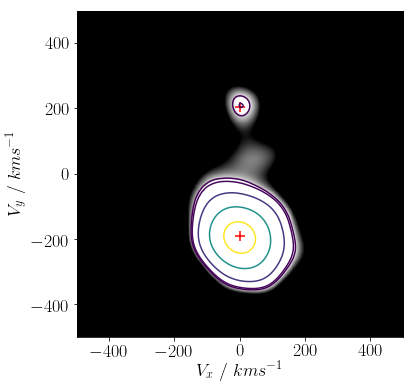

<Figure size 432x288 with 0 Axes>

In [22]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18

levels = np.array([1480,1525,1800,2500,3500, 4150])

fig, ax = plt.subplots(figsize=(6,6))
# im = ax.imshow(posData, cmap='gray', origin='lower', norm=LogNorm(vmin=1350, vmax=1800), extent=(X.min(), X.max(), Y.min(), Y.max()))
im = ax.imshow(data3, cmap='gray', origin='lower', vmin=1350, vmax=1500,
               extent=(X.min(), X.max(), Y.min(), Y.max()))
ax.contour(X, Y, data3, levels)
ax.scatter(0,205, marker='+', c='r', s=100)
ax.scatter(0,-190.6, marker='+', c='r', s=100)
ax.set_xlabel('$V_{x}~/~kms^{-1}$')
ax.set_ylabel('$V_{y}~/~kms^{-1}$')
plt.show()
plt.tight_layout()